In [125]:
import pandas as pd
import numpy as np
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup

import requests
import json
import matplotlib.pyplot as plt

# Prep attacking data from FBref.com

In [88]:
player_data = pd.read_csv('./data/player_data.csv')

#drop unwanted columns
player_data = player_data.drop(columns = ['Unnamed: 1', 'Per 90 Minutes', 'Per 90 Minutes.1', 'Per 90 Minutes.2', 'Per 90 Minutes.3', 'Per 90 Minutes.4', 'Per 90 Minutes.5', 'Per 90 Minutes.6', 'Per 90 Minutes.7', 'Per 90 Minutes.8', 'Per 90 Minutes.9', 'Unnamed: 29', '-additional'])

In [89]:
player_data.columns = player_data.iloc[0]
player_data = player_data[1:]

# replace with new headers
player_data

,Player,Pos,Age,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xA,npxG+xA
1,Marc-André ter Stegen,GK,30-166,12,12,1080,12.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,Robert Lewandowski,FW,34-053,12,11,988,11.0,14,2,14,0,0,0,0,10.1,10.1,2.7,12.7
3,Pedri,MF,19-322,12,10,867,9.6,2,0,2,0,0,0,0,2.3,2.3,2.0,4.2
4,Ousmane Dembélé,FW,25-151,12,10,836,9.3,3,4,3,0,0,3,0,2.4,2.4,3.0,5.4
5,Gavi Paez,MF,18-069,12,10,813,9.0,0,0,0,0,0,1,0,0.3,0.3,1.7,2.0
6,Sergio Busquets,MF,34-089,9,9,756,8.4,0,0,0,0,0,7,1,0.3,0.3,0.4,0.7
7,Raphinha,FW,25-303,11,8,610,6.8,1,1,1,0,0,1,0,2.1,2.1,2.0,4.1
8,Ronald Araújo,DF,23-220,7,7,600,6.7,0,0,0,0,0,2,0,0.6,0.6,0.2,0.8
9,Alejandro Balde,DF,18-360,9,7,596,6.6,0,3,0,0,0,1,0,0.1,0.1,1.6,1.7
10,Eric García,DF,21-277,9,7,588,6.5,1,0,1,0,0,0,0,0.9,0.9,0.1,1.0


In [115]:
# data processing, if player has not played over 100 minutes, remove as well
# also convert column data type to int where possible
player_data = player_data.fillna(0)
player_data = player_data.astype({'MP': 'int32'})
player_data = player_data.astype({'Starts': 'int32'})
player_data = player_data.astype({'Min': 'int32'})
player_data = player_data.astype({'90s': 'float'})
player_data = player_data.astype({'Gls': 'int32'})
player_data = player_data.astype({'Ast': 'int32'})
player_data = player_data.astype({'G-PK': 'int32'})
player_data = player_data.astype({'PK': 'int32'})
player_data = player_data.astype({'PKatt': 'int32'})
player_data = player_data.astype({'CrdY': 'int32'})
player_data = player_data.astype({'CrdR': 'int32'})
player_data = player_data.astype({'xG': 'float'})
player_data = player_data.astype({'npxG': 'float'})
player_data = player_data.astype({'xA': 'float'})
player_data = player_data.astype({'npxG+xA': 'float'})

for index, player in player_data.iterrows():
    if (player.Min <= 100):
        player_data = player_data.drop(index)


player_data

,Player,Pos,Age,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xA,npxG+xA
1,Marc-André ter Stegen,GK,30-166,12,12,1080,12.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,Robert Lewandowski,FW,34-053,12,11,988,11.0,14,2,14,0,0,0,0,10.1,10.1,2.7,12.7
3,Pedri,MF,19-322,12,10,867,9.6,2,0,2,0,0,0,0,2.3,2.3,2.0,4.2
4,Ousmane Dembélé,FW,25-151,12,10,836,9.3,3,4,3,0,0,3,0,2.4,2.4,3.0,5.4
5,Gavi Paez,MF,18-069,12,10,813,9.0,0,0,0,0,0,1,0,0.3,0.3,1.7,2.0
6,Sergio Busquets,MF,34-089,9,9,756,8.4,0,0,0,0,0,7,1,0.3,0.3,0.4,0.7
7,Raphinha,FW,25-303,11,8,610,6.8,1,1,1,0,0,1,0,2.1,2.1,2.0,4.1
8,Ronald Araújo,DF,23-220,7,7,600,6.7,0,0,0,0,0,2,0,0.6,0.6,0.2,0.8
9,Alejandro Balde,DF,18-360,9,7,596,6.6,0,3,0,0,0,1,0,0.1,0.1,1.6,1.7
10,Eric García,DF,21-277,9,7,588,6.5,1,0,1,0,0,0,0,0.9,0.9,0.1,1.0


In [118]:
player_data.describe()

,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xA,npxG+xA
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.0,22.0,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,8.545455,6.000000,539.090909,5.990909,1.272727,0.863636,1.272727,0.0,0.0,1.045455,0.045455,1.227273,1.227273,0.845455,2.072727
std,3.112605,3.280534,263.197899,2.923453,2.962975,1.320009,2.962975,0.0,0.0,1.587969,0.213201,2.163371,2.163371,0.925680,2.789638
min,2.000000,1.000000,122.000000,1.400000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,3.250000,345.500000,3.825000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.125000,0.125000,0.100000,0.725000
50%,9.000000,5.500000,491.500000,5.500000,0.500000,0.000000,0.500000,0.0,0.0,1.000000,0.000000,0.550000,0.550000,0.500000,1.100000
75%,11.750000,8.750000,719.500000,8.000000,1.000000,1.750000,1.000000,0.0,0.0,1.000000,0.000000,1.175000,1.175000,1.525000,1.925000
max,12.000000,12.000000,1080.000000,12.000000,14.000000,4.000000,14.000000,0.0,0.0,7.000000,1.000000,10.100000,10.100000,3.000000,12.700000


As we can see, PK and PKatt is all 0, meaning Barca has not been awared a penalty this season yet

# Prep defensive data from FBref.com

In [214]:
player_def_data = pd.read_csv('./data/player_def_data.csv')

player_def_data.columns = player_def_data.iloc[0]
player_def_data = player_def_data[1:]

player_def_data

,Player,Nation,Pos,Age,90s,Made_Tkl,Made_TklW,Made_Def 3rd,Made_Mid 3rd,Made_Att 3rd,...,Blocks,Block_Sh,ShSv,Block_Pass,Int,Tkl+Int,Clr,Err,Matches,-9999
1,Marc-André ter Stegen,de GER,GK,30-166,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Matches,6f51e382
2,Robert Lewandowski,pl POL,FW,34-053,7,4,1,0,1,3,...,6,0,0,6,1,5,1,0,Matches,8d78e732
3,Gavi Paez,es ESP,MF,18-069,6.4,13,10,1,8,4,...,5,1,0,4,9,22,4,0,Matches,19cae58d
4,Alejandro Balde,es ESP,DFFW,18-360,6.1,10,6,4,4,2,...,12,1,0,11,8,18,6,0,Matches,5ccc9672
5,Sergio Busquets,es ESP,MF,34-089,5.8,15,10,6,6,3,...,5,1,0,4,5,20,11,0,Matches,5ab0ea87
6,Pedri,es ESP,MF,19-322,5.8,7,6,2,3,2,...,9,0,0,9,9,16,4,0,Matches,0d9b2d31
7,Ronald Araújo,uy URU,DF,23-220,5.7,7,5,5,2,0,...,5,0,0,5,7,14,15,0,Matches,2bef2bca
8,Ousmane Dembélé,fr FRA,FW,25-151,5.6,6,4,1,2,3,...,9,0,0,9,1,7,0,0,Matches,b19db005
9,Raphinha,br BRA,FW,25-303,4.7,11,5,2,3,6,...,10,0,0,10,9,20,1,0,Matches,3423f250
10,Eric García,es ESP,DF,21-277,4.3,11,7,6,4,1,...,12,5,0,7,5,16,7,0,Matches,2bed3eab


In [215]:
# We dont count Stegen here, as before the Inter game, it is publicized he saved 19/20 shots face, 
# which clearly indicates his overperming is helping the team

no_gk_player_def_data = player_def_data[player_def_data['Pos'] != 'GK']
# we also drop unnessary data
no_gk_player_def_data = no_gk_player_def_data.drop(columns = ['Matches', '-9999'])

no_gk_player_def_data

,Player,Nation,Pos,Age,90s,Made_Tkl,Made_TklW,Made_Def 3rd,Made_Mid 3rd,Made_Att 3rd,...,Press_Mid 3rd,Press_Att 3rd,Blocks,Block_Sh,ShSv,Block_Pass,Int,Tkl+Int,Clr,Err
2,Robert Lewandowski,pl POL,FW,34-053,7,4,1,0,1,3,...,23,51,6,0,0,6,1,5,1,0
3,Gavi Paez,es ESP,MF,18-069,6.4,13,10,1,8,4,...,78,49,5,1,0,4,9,22,4,0
4,Alejandro Balde,es ESP,DFFW,18-360,6.1,10,6,4,4,2,...,17,15,12,1,0,11,8,18,6,0
5,Sergio Busquets,es ESP,MF,34-089,5.8,15,10,6,6,3,...,43,11,5,1,0,4,5,20,11,0
6,Pedri,es ESP,MF,19-322,5.8,7,6,2,3,2,...,54,35,9,0,0,9,9,16,4,0
7,Ronald Araújo,uy URU,DF,23-220,5.7,7,5,5,2,0,...,20,1,5,0,0,5,7,14,15,0
8,Ousmane Dembélé,fr FRA,FW,25-151,5.6,6,4,1,2,3,...,27,31,9,0,0,9,1,7,0,0
9,Raphinha,br BRA,FW,25-303,4.7,11,5,2,3,6,...,28,36,10,0,0,10,9,20,1,0
10,Eric García,es ESP,DF,21-277,4.3,11,7,6,4,1,...,29,1,12,5,0,7,5,16,7,0
11,Frenkie de Jong,nl NED,MF,25-154,4.2,12,10,3,6,3,...,31,12,3,0,0,3,5,17,3,0


In [216]:
team_total = no_gk_player_def_data.iloc[-2:-1].drop(columns = ['Player', 'Nation', 'Pos']).astype(float)
opp_total = no_gk_player_def_data.iloc[-1:].drop(columns = ['Player', 'Nation', 'Pos']).astype(float)

# team_performance_vs_opp = pd.Series(team_total)
# for label, val in team_total.items():
#     new_val = val - opp_total[label].as
#     print (new_val)
#     break
team_total.values[:] -= opp_total.values
team_total.to_csv('assessment_team_def.csv')

In [217]:
team_total

,Age,90s,Made_Tkl,Made_TklW,Made_Def 3rd,Made_Mid 3rd,Made_Att 3rd,Dribbler_Tkl,Dribbler_Tkl_Att_And_Past,Dribbler_Tkl%,...,Press_Mid 3rd,Press_Att 3rd,Blocks,Block_Sh,ShSv,Block_Pass,Int,Tkl+Int,Clr,Err
24,-1.9,0.0,-39.0,-26.0,-53.0,0.0,14.0,-30.0,-43.0,-8.6,...,-40.0,95.0,-30.0,-22.0,-1.0,-8.0,-27.0,-66.0,-21.0,-1.0


We can see that the team on average is younger than opponent, made less tackle due to having possession most of the time. 

Most of the pressing is done in the final 3rd, and there is sign of weak pressure in the midfield to help prevent counter attack

With only 1 error directly leads to goal, it can be said most of the weakness is in pressing and tacking in the midfield to prevent counter attack

In [218]:
no_gk_only_player_def_data = no_gk_player_def_data[:-2].drop(columns = ['Nation'])
no_gk_only_player_def_data

,Player,Pos,Age,90s,Made_Tkl,Made_TklW,Made_Def 3rd,Made_Mid 3rd,Made_Att 3rd,Dribbler_Tkl,...,Press_Mid 3rd,Press_Att 3rd,Blocks,Block_Sh,ShSv,Block_Pass,Int,Tkl+Int,Clr,Err
2,Robert Lewandowski,FW,34-053,7,4,1,0,1,3,1,...,23,51,6,0,0,6,1,5,1,0
3,Gavi Paez,MF,18-069,6.4,13,10,1,8,4,6,...,78,49,5,1,0,4,9,22,4,0
4,Alejandro Balde,DFFW,18-360,6.1,10,6,4,4,2,4,...,17,15,12,1,0,11,8,18,6,0
5,Sergio Busquets,MF,34-089,5.8,15,10,6,6,3,6,...,43,11,5,1,0,4,5,20,11,0
6,Pedri,MF,19-322,5.8,7,6,2,3,2,1,...,54,35,9,0,0,9,9,16,4,0
7,Ronald Araújo,DF,23-220,5.7,7,5,5,2,0,2,...,20,1,5,0,0,5,7,14,15,0
8,Ousmane Dembélé,FW,25-151,5.6,6,4,1,2,3,2,...,27,31,9,0,0,9,1,7,0,0
9,Raphinha,FW,25-303,4.7,11,5,2,3,6,3,...,28,36,10,0,0,10,9,20,1,0
10,Eric García,DF,21-277,4.3,11,7,6,4,1,4,...,29,1,12,5,0,7,5,16,7,0
11,Frenkie de Jong,MF,25-154,4.2,12,10,3,6,3,4,...,31,12,3,0,0,3,5,17,3,0


# Prep possession data from FBref.com

In [219]:
player_pos_data = pd.read_csv('./data/player_pass_data.csv')
player_pos_data.columns = player_pos_data.iloc[0]
player_pos_data = player_pos_data[1:]

player_pos_data

,Player,Nation,Pos,Age,90s,Touches,Touches_Def Pen,Touches_Def 3rd,Touches_Mid 3rd,Touches_Att 3rd,...,Carries_Final_Third,Carries_Penalty_Box,Carries_Fail,Carries_Dispose,Receiving_Targ,Receiving_Rec,Receiving_Rec%,Receiving_Prog,Matches,-9999
1,Marc-André ter Stegen,de GER,GK,30-166,8,315,257,310,5,0,...,0,0,0,0,199,199,100,0,Matches,6f51e382
2,Robert Lewandowski,pl POL,FW,34-053,7,289,1,6,122,175,...,5,3,20,11,319,239,74.9,65,Matches,8d78e732
3,Gavi Paez,es ESP,MF,18-069,6.4,396,5,32,233,163,...,16,6,11,7,344,303,88.1,37,Matches,19cae58d
4,Alejandro Balde,es ESP,DFFW,18-360,6.1,457,10,78,237,173,...,11,5,6,3,331,316,95.5,11,Matches,5ccc9672
5,Sergio Busquets,es ESP,MF,34-089,5.8,430,12,83,287,75,...,5,0,4,5,303,295,97.4,12,Matches,5ab0ea87
6,Pedri,es ESP,MF,19-322,5.8,427,6,40,263,163,...,21,1,4,5,365,340,93.2,18,Matches,0d9b2d31
7,Ronald Araújo,uy URU,DF,23-220,5.7,384,32,147,263,14,...,0,0,3,2,290,282,97.2,2,Matches,2bef2bca
8,Ousmane Dembélé,fr FRA,FW,25-151,5.6,385,1,12,135,273,...,23,23,7,9,362,312,86.2,37,Matches,b19db005
9,Raphinha,br BRA,FW,25-303,4.7,358,3,13,96,267,...,13,23,9,7,281,251,89.3,46,Matches,3423f250
10,Eric García,es ESP,DF,21-277,4.3,322,29,146,181,19,...,7,0,0,1,230,229,99.6,1,Matches,2bed3eab


In [220]:
# Remove unwanted columns
player_pos_data = player_pos_data.drop(columns= ['Nation', 'Age', 'Matches', '-9999'])

# Team stat separate
team_total = player_pos_data.iloc[-2:-1].drop(columns = ['Player', 'Pos']).astype(float)
opp_total = player_pos_data.iloc[-1:].drop(columns = ['Player', 'Pos']).astype(float)

team_total.values[:] -= opp_total.values
team_total.to_csv('assessment_team_pos.csv')

In [223]:
# Remove team stats of player df
player_pos_data = player_pos_data[:-2]

team_total

,90s,Touches,Touches_Def Pen,Touches_Def 3rd,Touches_Mid 3rd,Touches_Att 3rd,Touches_Att Pen,Touches_Live,Dribbles_Succ,Dribbles_Att,...,Carries_PrgDist,Carries_Prog,Carries_Final_Third,Carries_Penalty_Box,Carries_Fail,Carries_Dispose,Receiving_Targ,Receiving_Rec,Receiving_Rec%,Receiving_Prog
24,0.0,2458.0,-155.0,-194.0,1586.0,1283.0,193.0,2453.0,13.0,44.0,...,8874.0,398.0,97.0,57.0,-16.0,9.0,2447.0,2519.0,10.6,222.0


You can see that Barcelona is still playing their Tiki-Taka games with superior possession and passes, but we see signs of weaker Dribbler Success rate than Opponent (-6.9%)

In general, on the surface it looks like Barca is creating more chances, have more carries and dribbles into the final third, although with a lower success dribbling rate due to higher volume

# Evaluate personal attacking performance

In [120]:
xG_A = player_data['npxG+xA'].sum()
G_A = player_data['Gls'].sum() + player_data['Ast'].sum()

if (xG_A > G_A):
    print ("Team is underperforming xG by: ", xG_A - G_A)
elif (xG_A < G_A):
    print ("Team is overperforming xG by: ", G_A - xG_A)
else:
    print ("Team is performing exact to expectation")

Team is overperforming xG by:  1.3999999999999986


In [123]:
plus_diff_xG_A = player_data['Gls'] + player_data['Ast'] - player_data['npxG+xA']
player_data_plus_diff_xG_A = player_data
player_data_plus_diff_xG_A['plus_minus_xG_A'] = plus_diff_xG_A

player_data_plus_diff_xG_A.sort_values(by = 'plus_minus_xG_A')

,Player,Pos,Age,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xA,npxG+xA,plus_minus_xG_A
3,Pedri,MF,19-322,12,10,867,9.6,2,0,2,0,0,0,0,2.3,2.3,2.0,4.2,-2.2
7,Raphinha,FW,25-303,11,8,610,6.8,1,1,1,0,0,1,0,2.1,2.1,2.0,4.1,-2.1
5,Gavi Paez,MF,18-069,12,10,813,9.0,0,0,0,0,0,1,0,0.3,0.3,1.7,2.0,-2.0
15,Jordi Alba,DF,33-206,6,4,381,4.2,0,0,0,0,0,1,0,0.1,0.1,0.6,0.8,-0.8
8,Ronald Araújo,DF,23-220,7,7,600,6.7,0,0,0,0,0,2,0,0.6,0.6,0.2,0.8,-0.8
11,Frenkie de Jong,MF,25-154,10,4,528,5.9,1,0,1,0,0,0,0,1.1,1.1,0.6,1.7,-0.7
6,Sergio Busquets,MF,34-089,9,9,756,8.4,0,0,0,0,0,7,1,0.3,0.3,0.4,0.7,-0.7
18,Marcos Alonso,DF,31-289,5,4,326,3.6,0,0,0,0,0,0,0,0.1,0.1,0.4,0.5,-0.5
14,Gerard Piqué,DF,35-253,6,4,438,4.9,0,0,0,0,0,1,0,0.2,0.2,0.0,0.2,-0.2
12,Andreas Christensen,DF,26-186,6,6,455,5.1,0,0,0,0,0,1,0,0.1,0.1,0.1,0.2,-0.2


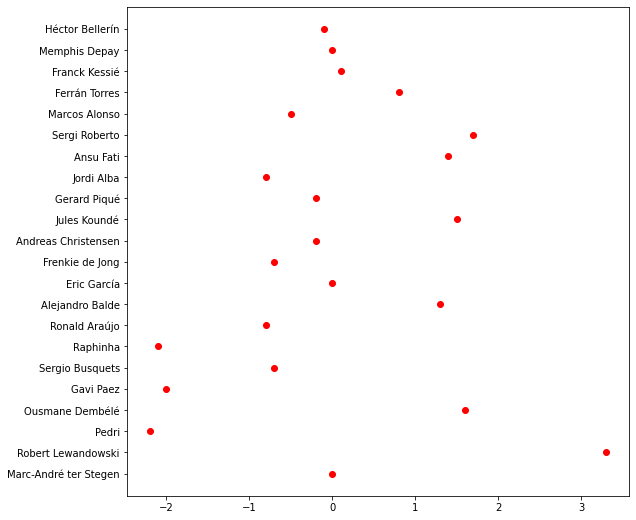

In [204]:
ax = plt.figure(figsize=(9,9))
ax = plt.plot(player_data_plus_diff_xG_A['plus_minus_xG_A'], player_data_plus_diff_xG_A['Player'], 'ro')

# Evaluate Personal Defence

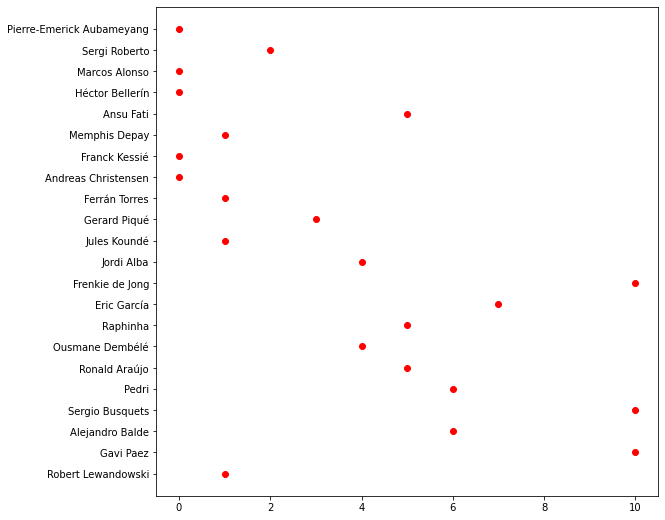

In [209]:
temp_df = no_gk_only_player_def_data['Made_TklW'].astype('float')

bx = plt.figure(figsize=(9,9))
bx = plt.plot(temp_df, no_gk_only_player_def_data['Player'], 'ro')

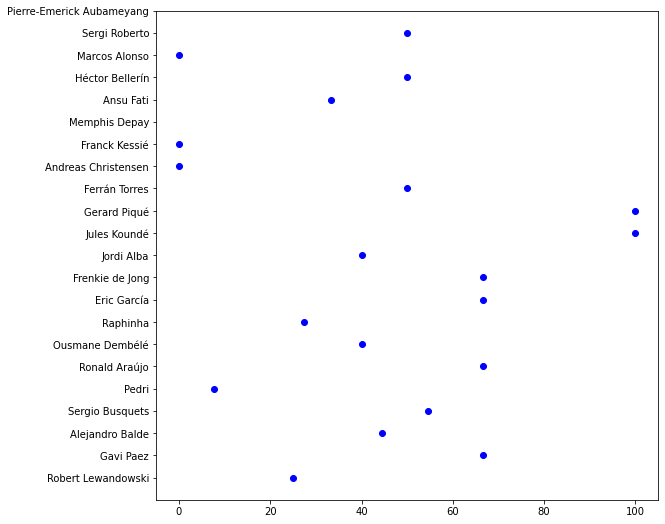

In [210]:
temp_df = no_gk_only_player_def_data['Dribbler_Tkl%'].astype('float')

cx = plt.figure(figsize=(9,9))
cx = plt.plot(temp_df, no_gk_only_player_def_data['Player'], 'bo')

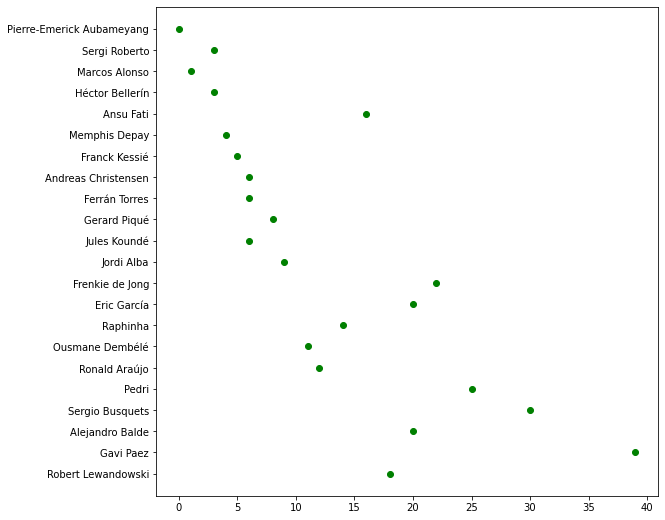

In [211]:
temp_df = no_gk_only_player_def_data['Press_Succ'].astype('float')

bx = plt.figure(figsize=(9,9))
bx = plt.plot(temp_df, no_gk_only_player_def_data['Player'], 'go')

# Evaluate Personal Performance when On-Ball

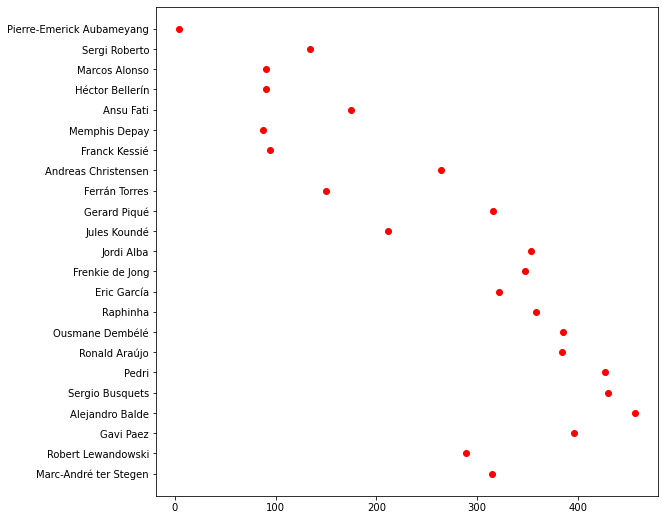

In [224]:
temp_df = player_pos_data['Touches'].astype('float')

cx = plt.figure(figsize=(9,9))
cx = plt.plot(temp_df, player_pos_data['Player'], 'ro')

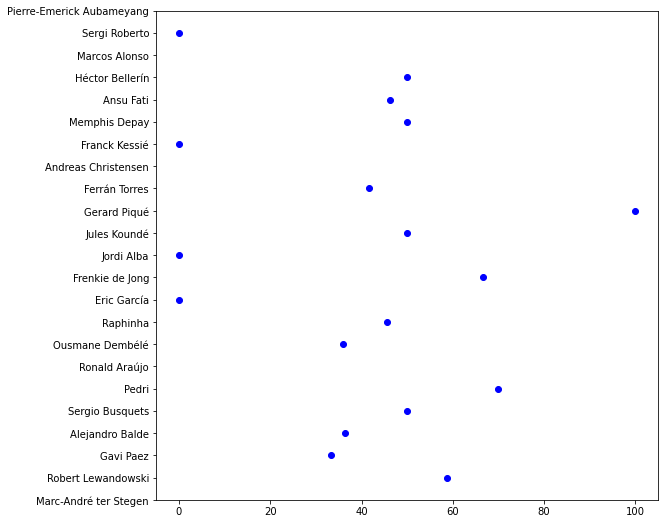

In [227]:
temp_df = player_pos_data['Dribbles_Succ%'].astype('float')

cx = plt.figure(figsize=(9,9))
cx = plt.plot(temp_df, player_pos_data['Player'], 'bo')

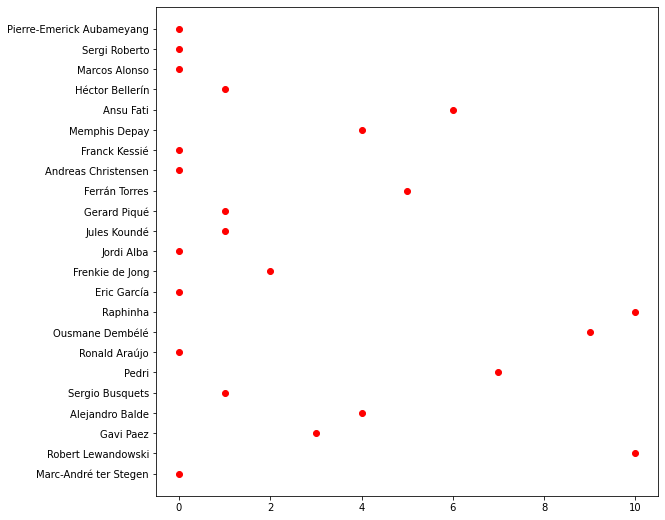

In [229]:
cx = plt.figure(figsize=(9,9))
cx = plt.plot(player_pos_data['Dribbles_Succ'].astype('float'), player_pos_data['Player'], 'ro')

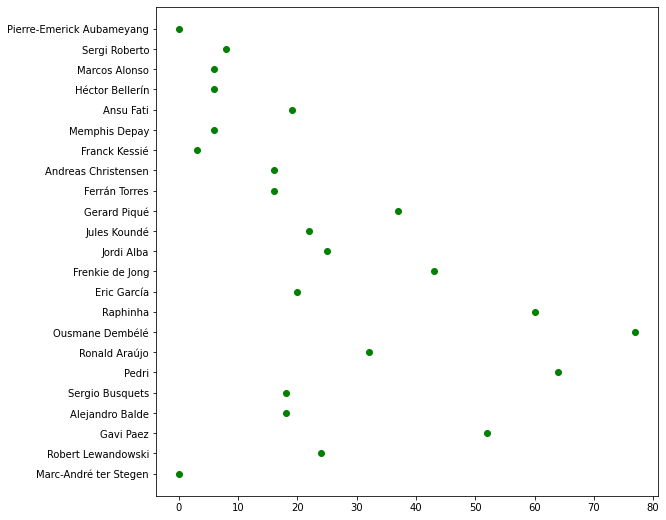

In [230]:
temp_df = player_pos_data['Carries_Prog'].astype('float')

cx = plt.figure(figsize=(9,9))
cx = plt.plot(temp_df, player_pos_data['Player'], 'go')

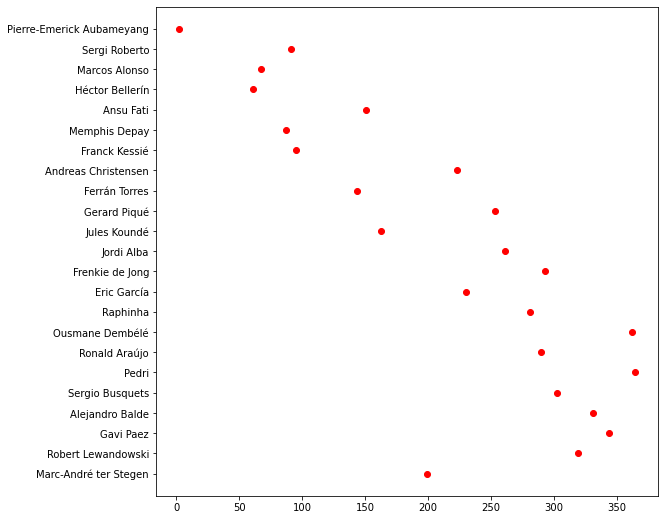

In [232]:
temp_df = player_pos_data['Receiving_Targ'].astype('float')

cx = plt.figure(figsize=(9,9))
cx = plt.plot(temp_df, player_pos_data['Player'], 'ro')